In [3]:
import numpy as np 
import scipy as sp
import matplotlib.pyplot as plt

In [18]:
def Projectile_Motion(theta,v0,y0):
    """Special case"""
    if v0 == 0:
        print("Nothing was thrown")
        return 0,0,0
    
    """Start conditions"""
    dt = 0.01
    g = 9.81
    ay = -g
    theta = np.radians(theta)
    t_tot = 2*v0*np.sin(theta)/g
    n = int(t_tot*100)+2 
    
    """Initializing arrays"""
    ypos_array = np.zeros(n+1)
    xpos_array = np.zeros(n+1)
    vy_array = np.zeros(n+1)
    vx_array = np.zeros(n+1)
    t = np.zeros(n+1)
    
    """Filling array"""
    vy_array[0] = v0*np.sin(theta)
    vx_array[0] = v0*np.cos(theta)
    ypos_array[0] = y0
    
    """Special case"""
    if theta == np.pi/2:
        vx_array[0] = 0
    
    """Calculation"""
    i = 0
    while ypos_array[i] >= 0:
        t[i] = t[i] + dt * i
        vy_array[i+1] = vy_array[i] + ay*dt
        vx_array[i+1] = vx_array[i]
        ypos_array[i+1] = ypos_array[i] + vy_array[i]*dt + 1/2*ay*dt**2
        xpos_array[i+1] = xpos_array[i] + vx_array[i]*dt 
        i += 1
    return xpos_array,ypos_array,t

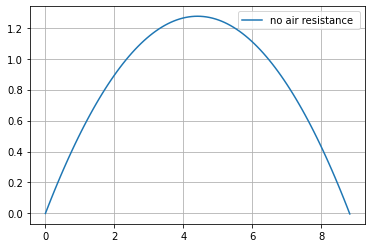

In [19]:
xpos_array,ypos_array,t = Projectile_Motion(30,10,0)
end = np.argwhere(ypos_array<0)[0][0]+1
plt.plot(xpos_array[:end],ypos_array[:end],label ="no air resistance ")

plt.legend()
plt.grid()
plt.show()

In [21]:
def Projectile_Motion_withair_Resistance(theta,v0,y0,m,k):
    """Special case"""
    if v0 == 0:
        print("Nothing was thrown")
        return 0,0,0
    
    """Start conditions"""
    dt = 0.01
    g = 9.81
    theta = np.radians(theta)
    t_tot = 2*v0*np.sin(theta)/g
    n = int(t_tot*100)+2 
    
    """Initializing arrays"""
    ypos_array = np.zeros(n+1)
    xpos_array = np.zeros(n+1)
    vy_array = np.zeros(n+1)
    vx_array = np.zeros(n+1)
    ay_array = np.zeros(n+1)
    ax_array = np.zeros(n+1)
    t = np.zeros(n+1)
    
    """Filling array"""
    vy_array[0] = v0*np.sin(theta)
    vx_array[0] = v0*np.cos(theta)
    ypos_array[0] = y0
    
    """Special case"""
    if theta == np.pi/2:
        vx_array[0] = 0
    
    """Calculation"""
    i = 0
    while ypos_array[i] >= 0:
        t[i] = t[i] + dt * i
        ay_array[i+1] = -g-k/m*vy_array[i]
        ax_array[i+1] = -k/m*vy_array[i]
        vy_array[i+1] = vy_array[i] + ay_array[i]*dt
        vx_array[i+1] = vx_array[i] + ax_array[i]*dt
        ypos_array[i+1] = ypos_array[i] + vy_array[i]*dt + 1/2*ay_array[i+1]*dt**2
        xpos_array[i+1] = xpos_array[i] + vx_array[i]*dt +1/2*ax_array[i+1]*dt**2
        i += 1
    return xpos_array,ypos_array,t

In [22]:
xpos_array_air,ypos_array_air,t = Projectile_Motion_withair_Resistance(30,10,0,5,0.47)

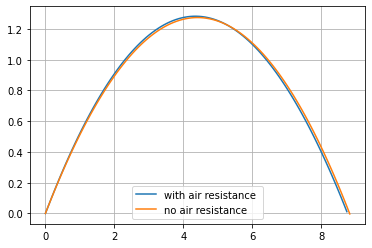

In [24]:
plt.plot(xpos_array_air[:end],ypos_array_air[:end],label ="with air resistance ")
plt.plot(xpos_array[:end],ypos_array[:end],label ="no air resistance ")

plt.legend()
plt.grid()
plt.show()